In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [192]:
data=pd.read_csv("/content/drive/MyDrive/xyz.csv",na_values="?")
data.head()



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [193]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [194]:
data.shape

(48842, 15)

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [196]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [197]:
data=data.dropna()

In [198]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [199]:
data['income'].value_counts()

income
<=50K    34014
>50K     11208
Name: count, dtype: int64

In [200]:
# <=50k -> 0
# >50k  -> 1

In [201]:
data['income']=data['income'].map({"<=50K":0,'>50K':1})

In [202]:
data['income'].value_counts()

income
0    34014
1    11208
Name: count, dtype: int64

##summary stats for numeric data

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.5+ MB


In [204]:
df=data.drop(['income'],axis=1)

In [205]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [206]:
28-17

11

In [207]:
90-47

43

In [208]:
data['capital-gain'].value_counts()

capital-gain
0        41432
15024      498
7688       391
7298       351
99999      229
         ...  
22040        1
1731         1
7262         1
1639         1
2387         1
Name: count, Length: 121, dtype: int64

##summary stats for categorical data

In [209]:
data.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,33307,14783,21055,6020,18666,38903,30527,41292


##univariate analysis

In [210]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

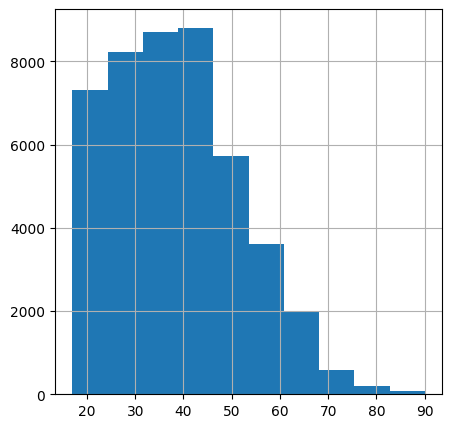

In [211]:
data['age'].hist(figsize=(5,5))
plt.show()

<Axes: >

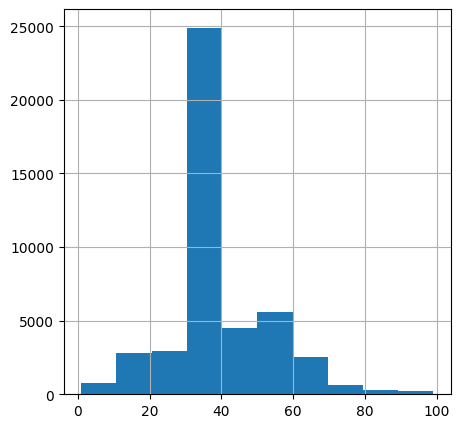

In [212]:
data['hours-per-week'].hist(figsize=(5,5))

##Bivariate analysis

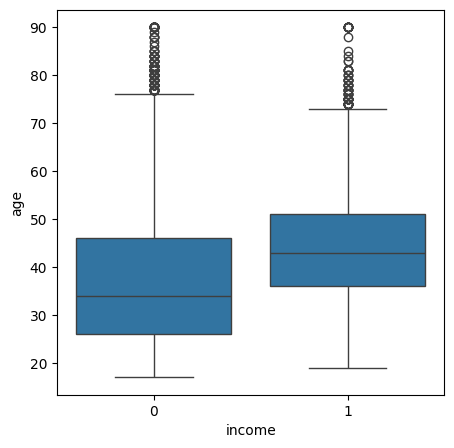

In [213]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(x="income",y="age",data=data)
plt.show()

In [214]:
# hypothesis
# null hypothess : there is no difference b/w mean  of age  of income group >50k and income group <=50k
# alt hypothesis : there is a difference b/w mean  of age  of income group >50k and income group <=50k

In [215]:
# two sample t test

In [216]:
import random
data = data[(np.abs(stats.zscore(data["age"]))<3)]
income_1=data[data["income"]==1]["age"]
income_0=data[data["income"]==0]['age']

income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)

income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)

In [217]:
ttest,pvalue=ttest_ind(income_1,income_0)
print(pvalue)

5.098543786460991e-07


In [218]:
if pvalue<0.05:
  print('we reject null hypo')
else:
  print("accept")

we reject null hypo


###categorical

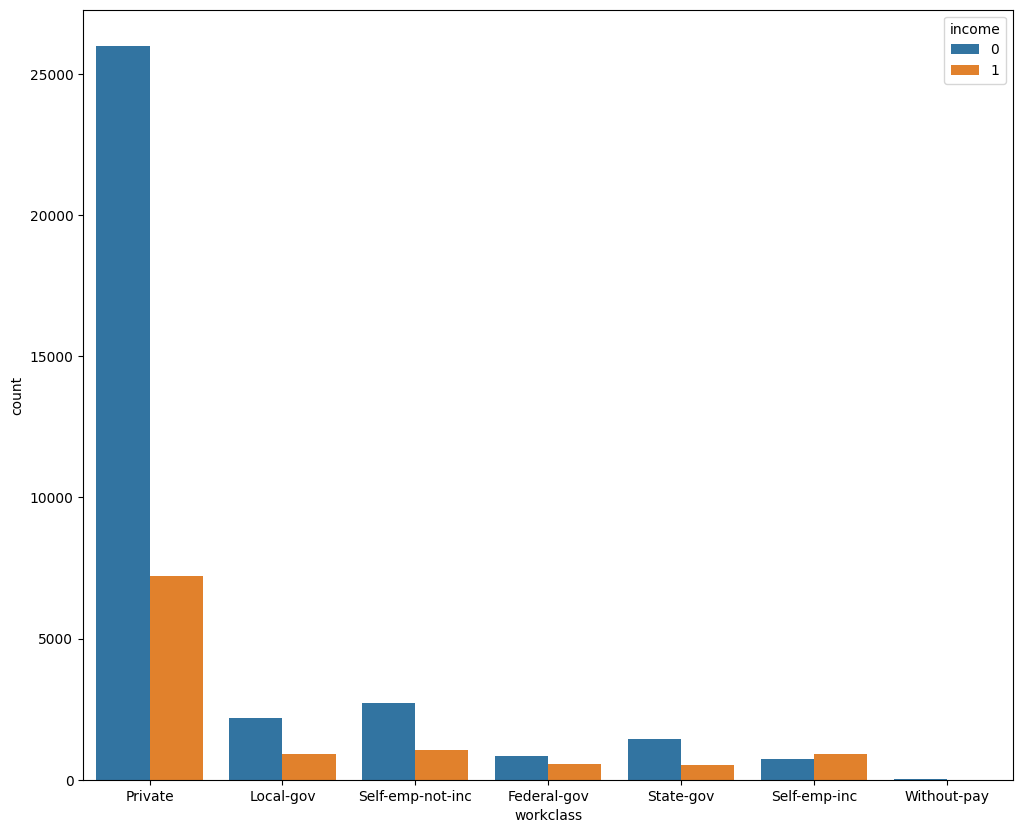

In [219]:
plt.figure(figsize=(12,10))
total= float(len(data["income"]))

ax=sns.countplot(x="workclass",hue="income",data=data)
plt.show()

In [220]:
# contingency table
c_t=pd.crosstab(data['workclass'].sample(frac=0.002,replace=True,random_state=1),data['income'].sample(frac=0.002,replace=True,random_state=1))

In [221]:
c_t

income,0,1
workclass,,
Federal-gov,2,3
Local-gov,5,3
Private,54,8
Self-emp-inc,2,0
Self-emp-not-inc,9,2
State-gov,1,1


- if stats>=critical value : reject null value
- if stats <critical value : accept null hypo

- null : no relationship b/w workclass and income
- alt  : there is relationship

In [222]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [223]:
stat,p,dof,expected=chi2_contingency(c_t)

In [224]:
prob=0.95
critical=chi2.ppf(prob,dof)


In [225]:
if abs(stat)>=critical:
  print("reject null hypo")
else:
  print("accept null hypo")

accept null hypo


In [226]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [227]:
data['capital_change']=data['capital-gain']-data['capital-loss']

In [228]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,capital_change
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,7688
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0,0


In [229]:
data=data.drop(['capital-gain','capital-loss'], axis=1)


In [230]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,capital_change
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1,7688
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0,0


In [231]:
data['gender']=data['gender'].map({"Male":0,'Female':1})

data['marital-status']=data['marital-status'].replace(['Never-married','Divorsed','Seperated','Widowed'],'Single')

In [250]:
data['marital-status']=data['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married')

In [233]:
data['marital-status']=data['marital-status'].map({'Married':1,'Single':0})

In [234]:
data=data.dropna()

In [235]:
data['marital-status']=data['marital-status'].astype(int)

In [236]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
capital_change     0
dtype: int64

In [237]:
data.drop(labels=['workclass','education','occupation',"relationship",'race','native-country','capital_change'],axis=1,inplace=True)
# pick the necessary columns----> bivariate analysis will help you to pick the columns

In [238]:
data.head()

,age,fnlwgt,educational-num,marital-status,gender,hours-per-week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,1,0,50,0
2,28,336951,12,1,0,40,1
3,44,160323,10,1,0,40,1
5,34,198693,6,0,0,30,0


In [239]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [240]:
from sklearn.model_selection import *

In [241]:
from sklearn.metrics import *

In [242]:
a=data.values

In [243]:
a

array([[    25, 226802,      7, ...,      0,     40,      0],
       [    38,  89814,      9, ...,      0,     50,      0],
       [    28, 336951,     12, ...,      0,     40,      1],
       ...,
       [    58, 151910,      9, ...,      1,     40,      0],
       [    22, 201490,      9, ...,      0,     20,      0],
       [    52, 287927,      9, ...,      1,     40,      1]])

In [244]:
x=a[:,0:6]
y=a[:,6]

In [245]:
x

array([[    25, 226802,      7,      0,      0,     40],
       [    38,  89814,      9,      1,      0,     50],
       [    28, 336951,     12,      1,      0,     40],
       ...,
       [    58, 151910,      9,      0,      1,     40],
       [    22, 201490,      9,      0,      0,     20],
       [    52, 287927,      9,      1,      1,     40]])

In [246]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [247]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

In [248]:
models=[]
models.append(('lr',LogisticRegression()))
models.append(("knn",KNeighborsClassifier()))
models.append(('dt',DecisionTreeClassifier()))
models.append(("nb",GaussianNB()))
models.append(('rf',RandomForestClassifier(n_estimators=100,random_state=45,max_features=3)))

In [249]:
result=[]
names=[]
for name,model in models:
  kfold=KFold(n_splits=10)
  cv_result=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
  result.append(cv_result)
  names.append(name)
  msg="%s: %f (%f)" %(name,cv_result.mean(),cv_result.std())
  print(msg)

lr: 0.721895 (0.007018)
knn: 0.683853 (0.009039)
dt: 0.742740 (0.007853)
nb: 0.764721 (0.006102)
rf: 0.780982 (0.008866)
